## 第二章 感知机

- 模型：

$$
f(x) = sign(w \cdot x + b)
$$

- 策略：最小化如下损失函数

$$
L(w, b) = - \sum {y_i (w \cdot x + b)}
$$

- 算法：

随机梯度下降，Stochastic Gradient Descent

In [13]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# load data
iris = load_iris()

x_train, y_train = iris.data[:100, :2], iris.target[:100]
y_train[y_train == 0] = -1

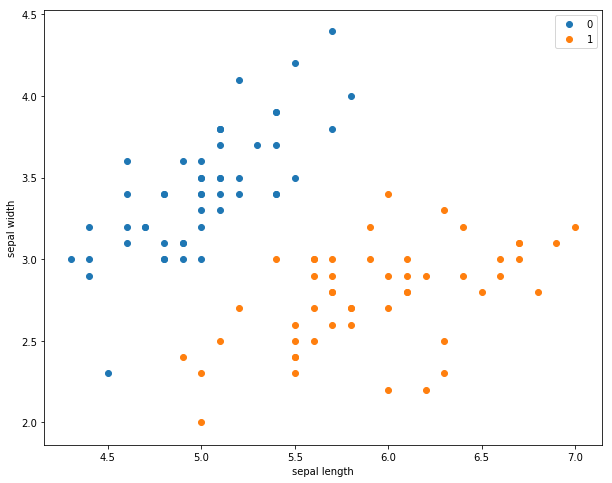

In [15]:
plt.scatter(x_train[:50, 0], x_train[:50, 1], label="0")
plt.scatter(x_train[50:, 0], x_train[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

plt.show()

In [16]:
from perceptron import Perceptron, DualPerceptron

In [17]:
# Original form perceptron
model1 = Perceptron()
%time model1.train(x_train, y_train, learning_rate=0.1, verbose=False)

CPU times: user 3.87 s, sys: 12.2 ms, total: 3.88 s
Wall time: 3.88 s


In [18]:
x_points = np.linspace(4, 7, 10)
y_pred = -(model1.W[0] * x_points + model1.b) / model1.W[1]
y_pred = np.squeeze(y_pred)

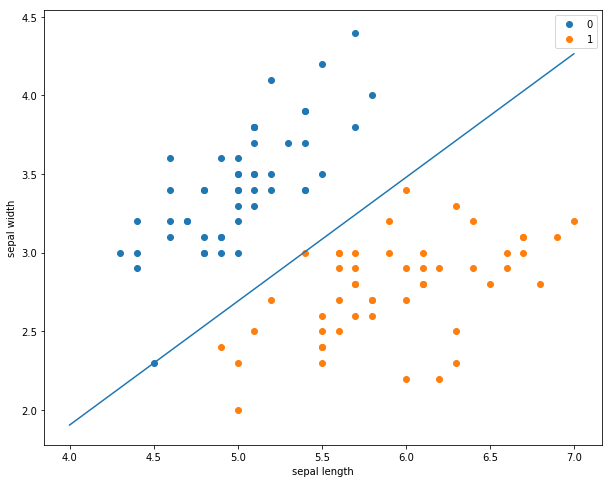

In [19]:
plt.plot(x_points, y_pred)

plt.scatter(x_train[:50, 0], x_train[:50, 1], label="0")
plt.scatter(x_train[50:, 0], x_train[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

plt.show()

In [20]:
# Dual form perceptron
model2 = DualPerceptron()
%time model2.train(x_train, y_train, learning_rate=0.1, verbose=False)

CPU times: user 3.98 s, sys: 30.3 ms, total: 4.01 s
Wall time: 3.98 s


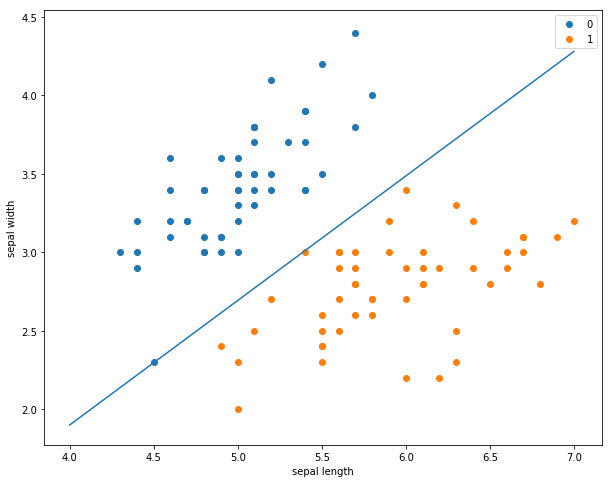

In [21]:
x_points = np.linspace(4, 7, 10)
y_pred = -(model2.W[0] * x_points + model2.b) / model2.W[1]
y_pred = np.squeeze(y_pred)

plt.plot(x_points, y_pred)

plt.scatter(x_train[:50, 0], x_train[:50, 1], label="0")
plt.scatter(x_train[50:, 0], x_train[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

plt.show()

## scikit-learn Perceptron

In [22]:
from sklearn.linear_model import Perceptron

In [23]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=False, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=False, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

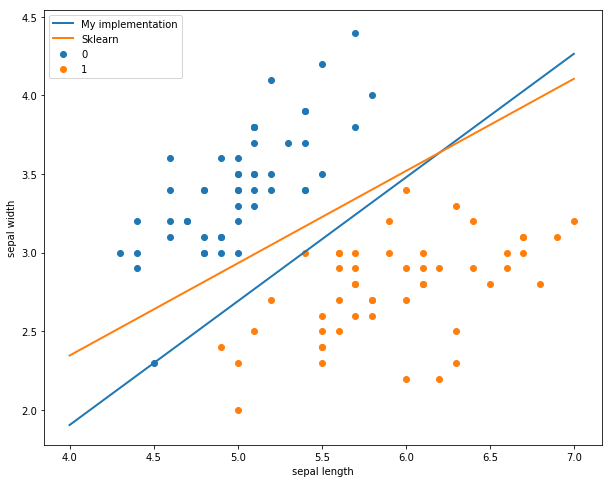

In [24]:
x_points = np.linspace(4, 7, 10)
y_mine = -(model1.W[0] * x_points + model1.b) / model1.W[1]
y_mine = np.squeeze(y_mine)
y_skl = - (clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]


plt.plot(x_points, y_mine, lw=2, label="My implementation")
plt.plot(x_points, y_skl, lw=2, label="Sklearn")

plt.scatter(x_train[:50, 0], x_train[:50, 1], label="0")
plt.scatter(x_train[50:, 0], x_train[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

plt.show()